# Natural Language Processing

In [48]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [49]:
# interactive shell to dowload files: d -> stopwords
# nltk.download_shell()

In [50]:
# A dataset of 5.5K SMS phone messages
messages = pd.read_csv(
    "./filez/smsspamcollection/SMSSpamCollection", sep="\t", names=["label", "message"]
)
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In text analysis, the **corpus** refers to the entire collection or set of documents being analyzed (in this case, the 5.5K messages)

## Exploratory Data Analysis

In [51]:
# there are repeated messages (call u later, yes/no, etc)
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [52]:
# show figures by label: popular messages by spam vs. ham
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [54]:
messages['length'] = messages['message'].apply(len)
messages.head(3)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155


## Data Visualization

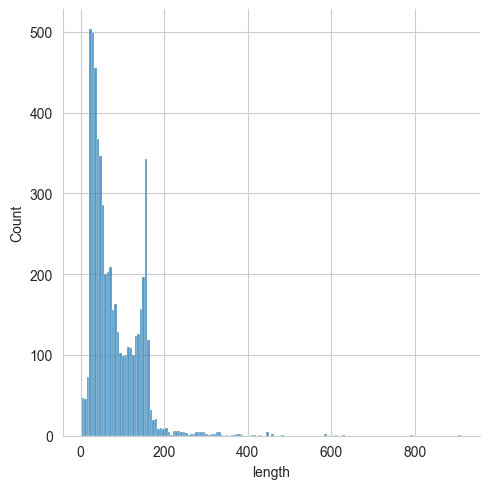

In [15]:
# distribution of the message length
# - increasing the bins, we can see a bimodal behaviour
# - also there seems to be very long messages (x-axis beyond 800)
sns.displot(data=messages, x='length', bins=150)

In [55]:
# max message length is 910 characters! 🧐
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [17]:
# some kind of shitty love letter 😅
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

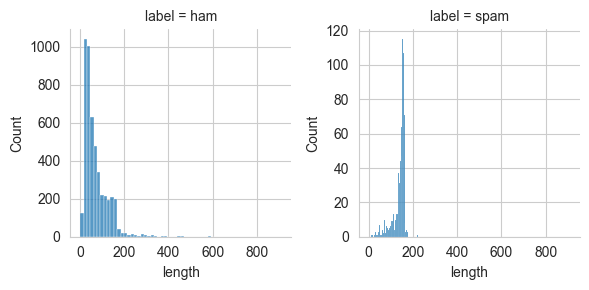

In [18]:
# Set up the FacetGrid (sharey=False -> each chart with their values scale)
g = sns.FacetGrid(messages, col="label", sharey=False)
g.map(sns.histplot, "length", bins=60)
plt.show()

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

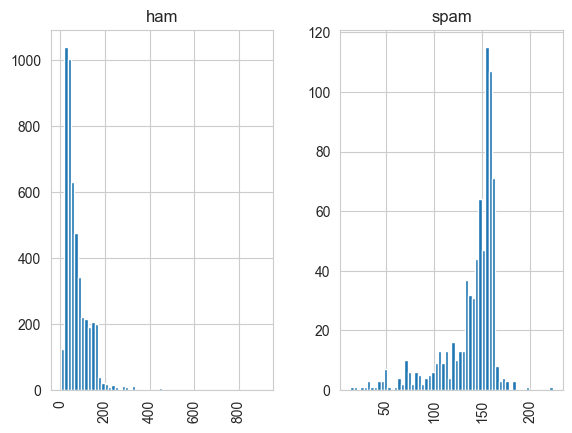

In [19]:
# same with pandas build-in charts
messages.hist(column='length', by='label', bins=60)

Preliminary outcomes:

    - spam messages tend to have more characters
    - spam are centered around 150 
    - ham are centered more around the 1-60 range

## Text Normalization
**Purpose**: The goal of text normalization is to bring text into a consistent format to simplify further processing. This can include a wide range of tasks.

**Common Tasks**:
- Converting all letters to lower or upper case.
- Removing punctuation, special characters, or numbers.
- Expanding abbreviations or converting contractions (e.g., "can't" to "cannot").
- Correcting spelling errors.
- Converting numbers to words or standardizing date and time formats.
- Handling of diacritics and accents in characters.

In [56]:
"""Remove punctuations"""
import string

# example on how to remove punctuations
mess = 'Sample message! Notice: it has punctuation.'
print(f'with punctuations:    {string.punctuation}')
no_punc = [c for c in mess if c not in string.punctuation]
print(f'without punctuations: {no_punc}')

# set no_punc back to the original string
no_punc = ''.join(no_punc)
print(f'updated message:      {no_punc}')

with punctuations:    !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
without punctuations: ['S', 'a', 'm', 'p', 'l', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'N', 'o', 't', 'i', 'c', 'e', ' ', 'i', 't', ' ', 'h', 'a', 's', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n']
updated message:      Sample message Notice it has punctuation


Depending on the type of text, further normalization is required. E.g. of two messages with the same meaning but different words:
    
    Nah dawg, IDK! Wut time u headin to da club?
vs.

    No dog, I don't know! What time are you heading to the club?
This is normally managed through **Stemming**.

## Tokenization
**Purpose**: Tokenization is the process of breaking text down into smaller units called tokens, which are often words or phrases, but can also include smaller units like subwords or characters.

**Common Approaches**:
- Word tokenization: Splitting the text into individual words.
- Sentence tokenization: Splitting the text into individual sentences.
- Subword or character tokenization: Breaking words into smaller subword units or characters, which is common in some neural network models.

In [57]:
"""Tokenize text"""

# set each word as element in list
tokens = no_punc.split()
tokens

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

## Remove Stop Words

**Purpose**: The goal is to eliminate frequent words that could skew the analysis or modeling in tasks like topic modeling or sentiment analysis. By removing these words, algorithms can focus on more meaningful words.

In [58]:
"""Remove common words"""
from nltk.corpus import stopwords

# common words that don't give any distinguishing feature
stopwords.words("english")[:10]

clean_mess = [
    word for word in tokens if word.lower() not in stopwords.words("english")
]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [59]:
# function to do all together
def text_process(mess):
    """
    1. remove punctuation
    2. remove stop words
    3. return list of clean text words
    """
    no_punc = [char for char in mess if char not in string.punctuation]
    no_punc = "".join(no_punc)
    return [
        word
        for word in no_punc.split()
        if word.lower() not in stopwords.words("english")
    ]

In [60]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Vectorization

The **Bag of Words** model will convert each message, represented as a list of tokens (lemmas), into a vector that machine learning models can understand through 3 steps:
1. Count how many times does a word occur in each message (aka. term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (aka. inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (aka. L2 norm)

Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer(analyzer=text_process).fit(messages["message"])
print(len(bow_transformer.vocabulary_))

11425


In [26]:
# we pick a random message (4)
mess4 = messages['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [63]:
# show the vector representation of the above message
"""
Format: (tuple) int -> (message_id, word_id) repetitions
"""
bow4 = bow_transformer.transform([mess4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


#### Vector representation (sparse matrix)
This output is a sparse matrix representation showing the frequency of specific words (tokens) in mess4,
which is 7 words and 2 of them repeated twice:

1) **Sparse Matrix Format**:
The output is in the format of a sparse matrix, where only non-zero elements are stored to save space. Each entry
in this matrix is a tuple of the form (row_index, column_index) count. Since we are transforming only one message,
row_index is 0 for all entries.

1) **Column Indices**:
The column_index (like 4068, 4629, etc.) refers to the index of a specific word in the vocabulary that was learned
by CountVectorizer when it was fitted to our entire messages dataset. Each unique word in the dataset is assigned
a unique index.

1) **Word Counts**:
The count after each tuple indicates how many times the corresponding word (indicated by the column index) appears
in mess4. For example, `(0, 4068) 2` means that the word corresponding to index 4068 in the vocabulary appears twice
in the message.

1) **Interpreting the Output**:
This output tells you which words (by their index in the vocabulary) are present in mess4 and their frequency.

In [64]:
# check word by the index number
bow_transformer.get_feature_names_out()[9554]

'say'

In [65]:
# Show the shape of the sparse matrix bow4 generated by the CountVectorizer
print(bow4.shape)

(1, 11425)


#### Matrix shape:
- **Number of Rows** `(1)`:
The first number in the shape, 1, indicates the number of documents (or text entries) that the bow4 matrix represents. In this case, there's only 1 message.

- **Number of Columns** `(11425)`:
The second number, 11425, represents the total number of unique words (or features) in the vocabulary that was learned by the CountVectorizer when it was fitted to your entire dataset (all messages in messages["message"]). This means that the CountVectorizer identified 11,425 unique words across all the documents it was trained on.


In [66]:
# sparse matrix with all messages
messages_bow = bow_transformer.transform(messages['message'])

In [77]:
# just show the first two messages in the sparse matrix
for i, j in zip(*messages_bow.nonzero()):
    # Check if the row index is 0 or 1
    if i == 0 or i == 1:
        print(f"({i}, {j})\t{messages_bow[i, j]}")
    elif i > 1:
        # Break the loop if the row index is greater than 1
        break

(0, 1110)	1
(0, 1483)	1
(0, 2060)	1
(0, 4653)	1
(0, 5217)	1
(0, 5218)	1
(0, 5769)	1
(0, 6217)	1
(0, 6906)	1
(0, 6937)	1
(0, 7555)	1
(0, 7668)	1
(0, 8336)	1
(0, 8917)	1
(0, 10965)	1
(0, 11163)	1
(1, 2451)	1
(1, 3064)	1
(1, 7701)	1
(1, 8590)	1
(1, 10698)	1
(1, 11072)	1


In [67]:
print('Shape of the Sparse Matrix:   ', messages_bow.shape)
print('Number of non-zero ocurrencies:', messages_bow.nnz)

Shape of the Sparse Matrix:    (5572, 11425)
Number of non-zero ocurrencies: 50548


    - 5,572  text messages
    - 11,425 unique words extracted from all the messages
    - 50,548 instances where a specific word appeared in a specific message

In [78]:
# alternative way to check the num. of unique words:
print('Number of unique words:', len(bow_transformer.vocabulary_))

Number of unique words: 11425


In [32]:
# Sparsity: Proportion of non-zero elements in our sparse matrix (messages_bow)
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print(f'sparsity: {sparsity}')

sparsity: 0.07940295412668218


#### Sparsity:

- Calculation:
  - `messages_bow.nnz`: This is the number of non-zero entries in the matrix. The .nnz attribute of a sparse matrix in Python gives the count of non-zero elements.
  - `messages_bow.shape[0] * messages_bow.shape[1]`: This calculates the total number of elements in the matrix (number of rows multiplied by the number of columns).
  - The sparsity is then calculated by taking the ratio of non-zero elements to total elements and multiplying by 100 to get a percentage.

- Output:
  - The output sparsity: 0.07940295412668218 means that only about 0.0794% of the elements in our matrix are non-zero. This is a very low percentage, indicating that the matrix is extremely sparse.


## Transform Sparse Matrix into a TF-IDF (Term Frequency-Inverse Document Frequency)

**Term Frequency (TF)**:
- Term Frequency measures how frequently a word appears in a document.
- If a word appears more often in a document, it's assumed to be more important for understanding that document's content. So, the term frequency increases as the word appears more frequently in that document.

**Inverse Document Frequency (IDF)**:
- Inverse Document Frequency measures the importance of a term across a set of documents, known as the corpus.
- If a word appears in many documents, it's considered less important for distinguishing one document from another. IDF decreases as the number of documents containing the word increases.
- The IDF of a word increases when it's rare across the corpus, making it potentially more significant for identifying the content of a specific document in which it appears.

**TF-IDF**:
- TF-IDF is the product of these two statistics (TF and IDF). It is a way to balance the frequency of a word in a single document (TF) with its frequency across the entire set of documents (IDF).
- Words that appear frequently in a single document but not frequently across multiple documents have high TF-IDF scores. These words are considered particularly relevant to that specific document.

In [33]:
# show the TF-IDS scores
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [34]:
# show the IDF score of word `university`
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

- The IDF value of 8.527076498901426 for the word "university" indicates that it is a relatively rare word in your dataset, and thus is considered more significant by the TF-IDF measure.
- This significance is used in calculating the TF-IDF score for documents that contain the word "university".
- To clarify:
  - IDF Score: Measures how common or rare a word is across all documents in the corpus. A higher IDF score indicates the word is rare, while a lower score indicates the word is common. In our case, it is the IDF part of the TF-IDF calculation for the word "university".
  - TF-IDF Score: Combined measure that incorporates both the Term Frequency (TF) and the Inverse Document Frequency (IDF). The TF-IDF score for a specific word in a specific document would be the product of its TF (how many times the word appears in that document) and its IDF (the value you obtained from the code snippet).

In [79]:
# show the minimum and maximum IDF values, to understand
# whether a particular IDF score is 'high' or 'low'
idf_values = tfidf_transformer.idf_
min_idf = idf_values.min()
max_idf = idf_values.max()

print(f'Minimum IDF value: {min_idf}')
print(f'Maximum IDF value: {max_idf}')

Minimum IDF value: 3.2800524267409408
Maximum IDF value: 8.93254160700959


## Train the Model

In [80]:
# train the model with a classification algo, such as Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

message_tfidf = tfidf_transformer.transform(messages_bow)
spam_detect_model = MultinomialNB().fit(message_tfidf, messages['label'])

## Prediction

In [81]:
# compare actual vs. prediction on message 4
print(f'actual    : {messages['label'][3]}')
print(f'prediction: {spam_detect_model.predict(tfidf4)[0]}')

actual    : ham
prediction: ham


In [39]:
all_pred = spam_detect_model.predict(message_tfidf)
all_pred[:5]

array(['ham', 'ham', 'spam', 'ham', 'ham'], dtype='<U4')

⛔️ We are evaluating accuracy with the same data we used for training, but we **should never actually evaluate on the same dataset we train on**! 

## Train/Test Split

- Now doing a proper train/test split but directly from the original messages.
- For real-world NPL, we don't need to do the above steps off the train/test data, but directly through a data pipeline to avoid to repeat everything with different sets of data.

In [82]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(
    messages["message"], messages["label"], test_size=0.2
)

## Data Pipeline
Store a pipeline of workflow to allow us to set up all the transformations that we will do to the data for future use.

In [41]:
from sklearn.pipeline import Pipeline

"""
bow -> strings to token integer counts
tfidf -> integer counts to weighted TF-IDF scores
classifier -> train on TF-IDF vectors w/ Naive Bayes classifier
"""

pipeline = Pipeline(
    [
        ("bow", CountVectorizer(analyzer=text_process)),
        ("tfidf", TfidfTransformer()),
        ("classifier", MultinomialNB()),
    ]
)

In [42]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x175bbf2e0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

## Model Evaluation

In [43]:
predictions = pipeline.predict(msg_test)

In [44]:
from sklearn.metrics import classification_report

print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1454
        spam       1.00      0.75      0.86       218

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.97      0.97      1672



## Change classifier in Pipeline

In [45]:
# Now we can easily change the classifier algo
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(
    [
        ("bow", CountVectorizer(analyzer=text_process)),
        ("tfidf", TfidfTransformer()),
        ("classifier", RandomForestClassifier()),
    ]
)
pipeline.fit(msg_train, label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1454
        spam       1.00      0.81      0.90       218

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672



## Prediction

In [91]:
def predictor(msg: str):
    msg_prediction = pipeline.predict([msg])
    print(f"{msg_prediction[0]} -> {msg}")


predictor("how r u doing bro?")
predictor("Congratulations! you just won a lottery prize. Please claim your reward before it expires in 48 hours.")
predictor("shall we grab some coffee?")
predictor("Please visit our website at www.chelin.com and claim your aidrop amount of 5,000 LINK.")


ham -> how r u doing bro?
spam -> Congratulations! you just won a lottery prize. Please claim your reward before it expires in 48 hours.
ham -> shall we grab some coffee?
spam -> Please visit our website at www.chelin.com and claim your aidrop amount of 5,000 LINK.
